<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/ChaosControlandSynchronization(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chaos Control and Synchronization - Part 1
##The OGY Method
## Juan C. Reyes - Dalhousie University 
### Dec. 12, 2019.

### The following notebook is based from Stephen Lynch's Book: Dynamical Systems with Applications using Python.
### Chapter 19: Chaos Control and Synchronization

The aim of this exercise is to give a quick overview of chaotic dynamics (p196,360) and then see how the new and exciting field of chaos control and synchronization is being applied to a broad range of physical systems in biochemistry, cardiology, communications, cryptography, finance, and many more.

I present a brief introduction to chaos control methods for one- and two-dimensional discrete dynamical systems as well as methods of chaos synchronization. (p.491) 
In practise, we cannot escape chaos, it is everywhere around us. It has been observed even in simple models in cardiology, chemical reactions, electronic circuits, population dynamics, and weather forecasting. Many scientists have tried to remove chaotic behaviour from their models and the maxim "stability good, chaos bad" came to be. However since the 1990's through developments in control theory and nonlinear dynamics scientists came to realize the potential uses for chaotic behaviour replacing the maxim with "stability good, chaos better."

We begin by looking at the time series data and phase space dynamics of chaotic systems and then implement the OGY Method to perform chaos control. We will illustrate through time series data how the chaos is controlled.

# Chaos Theory

Chaos theory is an interdisciplinary theory that states that within the apparent randomness of many physical systems there are actually underlying patterns, repetition, fractals, and self-organization. Often associated with the metaphor of *the buttlerfly effect* of how a butterfly flapping its wings in Mexico can cause a hurricane in Halifax. Mathematically, the smallest change in a deterministic nonlinear system results in drastic differences in the system's long term behaviour. We call this *sensitivity to initial conditions*. This sensitivity to initial conditions such as rounding error in our computational models can yield diverging outcomes therefore making long-term prediction of the behaviour of physical systems impossible.

There is no universally accepted definition of chaos, but the following characteristics are often good indicators of chaotic behaviour:

* Long-term aperiodic (nonperiodic) behavior;
* Sensitivity to initial conditions;
* Fractal Structure.

# Introduction to Chaos: The Logistic Equation 
<h1><center>$ x_{n+1} = rx_{n}(1-x_{n})$</center></h1>

The logistic equation represents a very basic *demographic* model that take into account two counteracting processes that determine the size of a population: the reproduction rate, and starvation due to a limited food supply. You might remember seeing this equation in our Interacting Species exercise! This equation is ***the*** archetypal example of chaos theory and illustrates how complex dynamical behaviour in systems may arise out of a very simple non-linear dynamical equation (note that this is just a parabola that most students learn in highschool!) This equation was popularized in 1976 by a biologist known as Robert May. Let's take a look at it together.




We define our population size to be the variable $x$. If there are no animals in the population then $x=0$, and if the population reaches its maximum size (due to limited food supply) then $x=1$.
The index $n$ represents the *time step*

On the right hand side of the equation we see $x_{n}$, which represents the *current* size of the population. This expression is being multiplied by $r$ which represents the rate of reproduction of a particular species. Thus, the product of $r*x_{n}$ represents the new number of offspring.

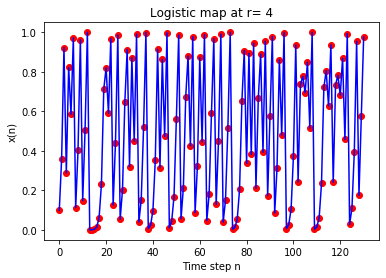

In [7]:
# The state space is the unit interval:
#       x in [0,1]
# and the control parameter ranges in
#       r in [0,4]

# Import plotting routines
from pylab import *

# System Parameters
# Control parameter of the map: A period-3 cycle
r = 4
# Set up an array of iterates and set the initital condition
x = [0.1]
# The number of iterations to generate
N = 130

# The main loop that generates iterates and stores them
for n in range(0,N):
  # at each iteration calculate x_n+1
  # and append to list x
  x.append( r*x[n]*(1.-x[n]) )

# Setup the plot
xlabel('Time step n') # set x-axis label
ylabel('x(n)') # set y-axis label
title('Logistic map at r= ' + str(r)) # set plot title
# Plot the time series: once with circles, once with lines
plot(x, 'ro', x , 'b')

# Use command below to save figure
#savefig('LogisticMap', dpi=600)

# Display the plot in a window
show()


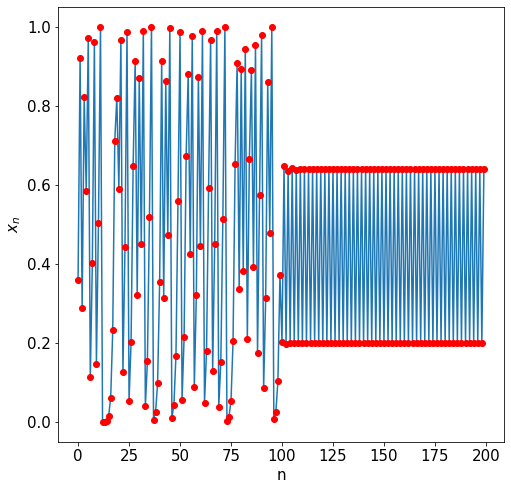

In [8]:
# %load Program_19a.py
# Program 19a: Chaos control in the logistic map.
# Control to period two.
# See Figure 19.3(b).

import matplotlib.pyplot as plt
import numpy as np

# Parameters
mu = 4
k = 0.217
num_iterations = 100
xs, x = [], [0.1]
ns = np.arange(0, num_iterations, 2)
nsc = np.arange(num_iterations, 2*num_iterations, 2)

for n in ns:
    x1 = mu*x[n] * (1 - x[n])
    x.append(x1)
    xs.append([n, x1])
    x2 = mu*x1 * (1 - x1)
    x.append(x2)
    xs.append([n+1, x2])

for n in nsc:
    x1 = k*mu*x[n] * (1 - x[n])
    x.append(x1)
    xs.append([n, x1])
    x2 = mu*x1 * (1 - x1)
    x.append(x2)
    xs.append([n+1, x2])

xs = np.array(xs)

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(xs[:, 0], xs[:, 1])
plt.plot(xs[:, 0], xs[:, 1], 'ro')

plt.xlabel('n', fontsize=15)
plt.ylabel(r'$x_n$', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()
